# KNN for Iris flowers classification

In [1]:
# import modules
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets as ds
from sklearn.model_selection import train_test_split

In [2]:
# load iris dataset
iris = ds.load_iris()

In [3]:
# assign iris features to X, an array of shape (150,4)
# assign iris labels to y, an array of shape (150,)
X = iris['data']
y = iris['target']

## (a) calculate elements in each class

In [4]:
# calculate elements in each class
label_id,label_count = np.unique(y, return_counts=True)
# print out the result
for label, count in zip(label_id, label_count):
    print("Class %d has %d elements."%(label, count))

Class 0 has 50 elements.
Class 1 has 50 elements.
Class 2 has 50 elements.


## (b) build a KNeighborsClassifier with k=1

In [5]:
# initialize the knn model
model_knn = KNeighborsClassifier(n_neighbors=1)
model_knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [6]:
# calculate prediction accuracy
predicted_label = model_knn.predict(X)
# print out the accuracy
print("The accuracy is %d%%"%(np.mean(predicted_label == y)*100))

The accuracy is 100%


## (c) find optimal value of k

In [7]:
# split the dataset into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=True, random_state=0)

In [8]:
# try different value of k from 1 to 50
K = 50
train_accu = np.zeros(50)
test_accu = np.zeros(50)
for i in range(1,K+1):
    # initialize the model
    model_knn = KNeighborsClassifier(n_neighbors=i)
    # fit the data
    model_knn.fit(X_train,y_train)
    # store training accuracy in train_accu
    predicted_train_label = model_knn.predict(X_train)
    train_accu[i-1] = np.mean(predicted_train_label == y_train)
    # store validation accuracy in test_acc
    predicted_test_label = model_knn.predict(X_test)
    test_accu[i-1] = np.mean(predicted_test_label == y_test)

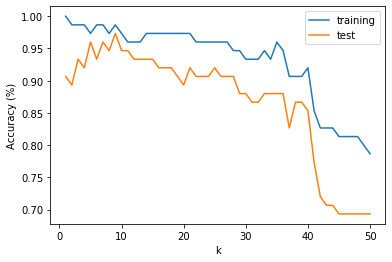

In [9]:
# plot the training accuracy and test accuracy against k
plt.figure()
plt.xlabel('k')
plt.ylabel('Accuracy (%)')
x_range = np.linspace(1, K, num=K)
plt.plot(x_range, train_accu, label='training')
plt.plot(x_range, test_accu, label='test')
plt.legend()

In [10]:
# find the optimal k value
optimal_k = test_accu.argmax() + 1#the test_accu index start from 0
# print out the optimal k
print("The optimal k value is: %d"%(optimal_k))

The optimal k value is: 9


## (d) predict a new sample

In [11]:
# check the order of the features
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [12]:
# match the input values with the feature names
features = np.array([[3.8, 5.0, 1.2, 4.1]])

In [13]:
model_knn = KNeighborsClassifier(n_neighbors=optimal_k)
model_knn.fit(X,y)
# make prediction
predicted_label = model_knn.predict(features)
# print out the prediction result
print("Predicted class of this plant: %d"%(predicted_label[0]))

Predicted class of this plant: 0
